In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from GeneralizedRegressionNeuralNetworks import GRNN
import matplotlib.pyplot as plt
plt.rcParams["font.family"]="Times New Roman"
np.set_printoptions(precision=3)

In [22]:
class GRNN :

    def __init__(self,x_train,y_train,x_test,y_test):

        self.x_train= x_train
        self.y_train= y_train
        self.x_test= x_test
        self.y_test= y_test

        self.std     = np.ones((1,self.y_train.size))#np.random.rand(1,self.train_y.size) #Standard deviations(std) are sometimes called RBF widths.

    def activation_func(self,distances): # gaussian kernel
        
        return np.exp(- (distances**2) / 2*(self.std**2) )

    def output(self,i):#sometimes called weight
        # print(self.x_test[i],self.x_train)
        distances=np.sqrt(np.sum((self.x_test[i]-self.x_train)**2,axis=1)) # euclidean distance

        return self.activation_func(distances)
   
    def denominator(self,i):

        return np.sum(self.output(i))

    def numerator(self,i): 

        return  np.sum(self.output(i) * self.y_train)
    
    def predict(self):

        predict_array = np.array([])

        for i in range(self.y_test.size):
            predict=np.array([self.numerator(i)/self.denominator(i)])
            predict_array=np.append(predict_array,predict)
        
        return predict_array

    
    def mean_squared_error(self):

        return (self.predict()-self.y_test)**2 /self.y_test.size
    
    def root_mean_squared_error(self):

        return np.sqrt(self.mean_squared_error())


In [3]:
#读取数据
database_name="data2"
# database_name="all"

model_name="GRNN"
def load_data(name):
    location="./data/"+name+".csv"
    data=pd.read_csv(location,sep=",").iloc[:,:]
    return data

In [4]:
data_org=load_data(database_name)
data_x,data_y=data_org.iloc[:,:-1],data_org.iloc[:,-1]

In [5]:
ratio=0.35

In [6]:
#划分测试集（暂定随机抽样）
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train_full, x_test, y_train_full, y_test = train_test_split(data_x,data_y,test_size=ratio, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.15,random_state=42)

In [7]:
print(x_train.shape,x_test.shape,x_valid.shape)

(85, 3) (55, 3) (16, 3)


### Create model

In [8]:
x_train_full=np.array(x_train_full)
y_train_full=np.array(y_train_full)
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

In [31]:
model = GRNN(x_train,y_train,x_test,y_test)

In [32]:
print('Output                                 :',model.predict())
print('MSE                                    :',model.mean_squared_error())

Output                                 : [0.496 0.644 0.468 0.595 0.468 1.162 0.439 0.292 0.452 0.43  1.032 0.483
 1.12  0.471 0.658 1.005 0.331 0.543 0.385 0.336 0.518 1.327 0.643 0.803
 0.829 0.285 0.499 0.56  0.596 0.51  0.818 0.335 0.831 0.355 0.408 0.429
 0.398 0.541 0.996 0.77  0.361 0.339 0.198 0.705 0.583 0.748 0.309 0.516
 0.708 0.748 0.537 0.462 0.803 0.269 0.188]
MSE                                    : [6.401e-07 1.196e-05 7.986e-05 1.798e-05 9.497e-08 7.921e-04 1.121e-06
 1.918e-05 7.237e-05 2.141e-05 2.597e-07 1.688e-05 1.508e-05 3.713e-05
 1.003e-05 1.189e-05 2.245e-05 2.912e-05 8.865e-06 6.068e-07 5.540e-08
 6.617e-04 3.635e-06 6.685e-06 3.619e-04 2.689e-05 1.142e-04 2.333e-04
 1.992e-10 2.824e-07 1.555e-07 4.488e-05 2.608e-04 1.894e-05 1.704e-07
 8.119e-09 1.978e-05 1.196e-04 7.367e-04 3.203e-04 2.946e-05 5.457e-05
 1.306e-05 2.718e-07 1.301e-07 2.656e-05 2.250e-05 4.726e-05 2.959e-07
 8.434e-05 1.380e-06 3.605e-05 1.600e-05 2.853e-06 1.300e-05]


In [11]:
def relative_error(y_true,y_pred):
    term1=np.sqrt(np.square(y_true-y_pred).sum())
    term2=np.sqrt(np.square(y_true).sum())
    return term1/term2

In [33]:
y_pred=model.predict()
test_r1=relative_error(y_test, y_pred)
test_r1

0.11007609281927061

In [26]:
y_train_pred=model.predict_train()


IndexError: index 55 is out of bounds for axis 0 with size 55

In [13]:
from sklearn.metrics import mean_squared_error#导入计算误差的函数
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
test_r2= r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
print("RMSE",test_rmse)
print("R2",test_r2)

RMSE 0.06668388049434412
R2 0.9144693534206259


In [23]:
def save_test_data():
    data=pd.DataFrame({
        "Ltx":x_test[:,0],
        "D":x_test[:,1],
        "MI":x_test[:,2],
        "y":y_test,
        "pred":y_pred,
        "r1":r1,
        "R2":test_r2,
        "RMSE":test_rmse
        
    })
    location="./result/test/performance/"
    name=model_name+"_"+database_name+"_"+str(ratio)+"_test_performance"+".csv"
    data.to_csv(location+name,header=True,mode='w')
    print("done save to",name)
    return data
test_result=save_test_data()

done save to GRNN_data2_0.35_test_performance.csv


In [136]:
data_save=pd.DataFrame({"ratio":ratio
                        ,"train":x_train.shape[0]
                        ,"test":x_test.shape[0]
                        ,"valid":x_valid.shape[0]
                        ,"r1":r1
                        ,"r2":test_r2
                        ,"RMSE":test_rmse
                       , "model":model_name},index=[0])
save_loc="./result/result.csv"
data_save.to_csv(save_loc,mode="a+",index=False,header=False)
# data_save.to_csv(save_loc,mode="a+",index=False)

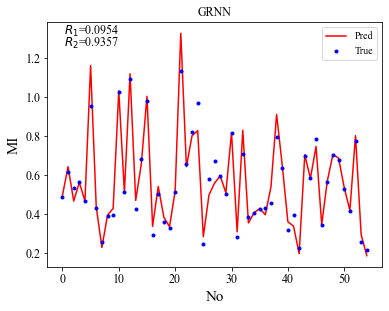

In [77]:
x_draw=np.arange(y_pred.shape[0])
fig,ax=plt.subplots(1,1,figsize=(6,4.5))
ax.tick_params(labelsize=12)
ax.plot(x_draw,y_pred,"r-",label="Pred")
ax.plot(x_draw,y_test,"b.",linewidth=5,label="True")
ax.set_xlabel("No",fontsize=15)
ax.set_ylabel("MI",fontsize=15)
ax.set_title(model_name)
ax.legend()

ax.text(0.05,0.95,s=("$R_1$="+str(round(r1,4))),fontsize=12,transform=ax.transAxes)
ax.text(0.05,0.9,s=("$R_2$="+str(round(test_r2,4))),fontsize=12,transform=ax.transAxes)


fig.savefig("./figure/"+model_name+"_"+database_name+"_"+str(round(r1,4))+"_demo.png",dpi=150,
           bbox_inches="tight")